In [1]:
pip install networkx matplotlib

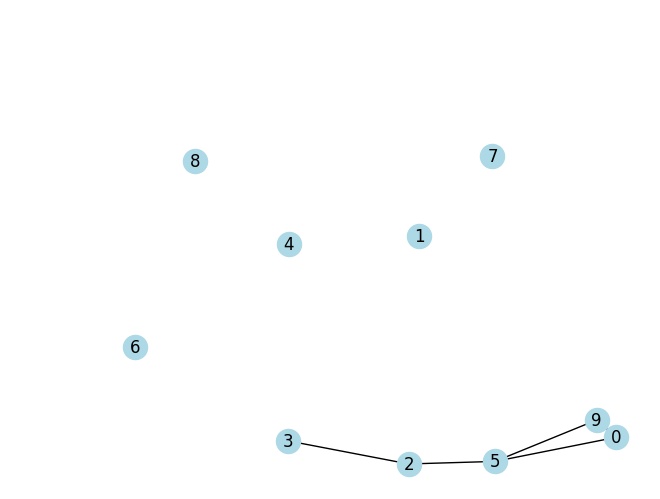

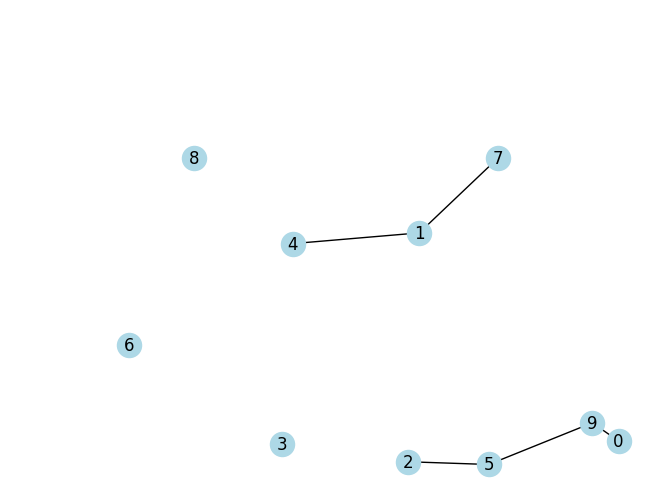

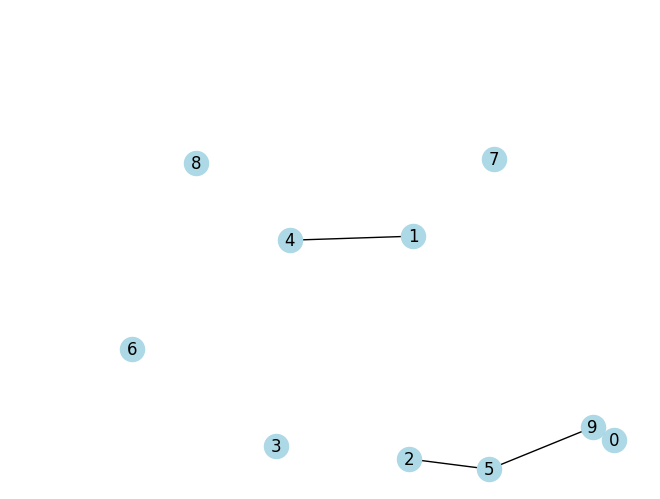

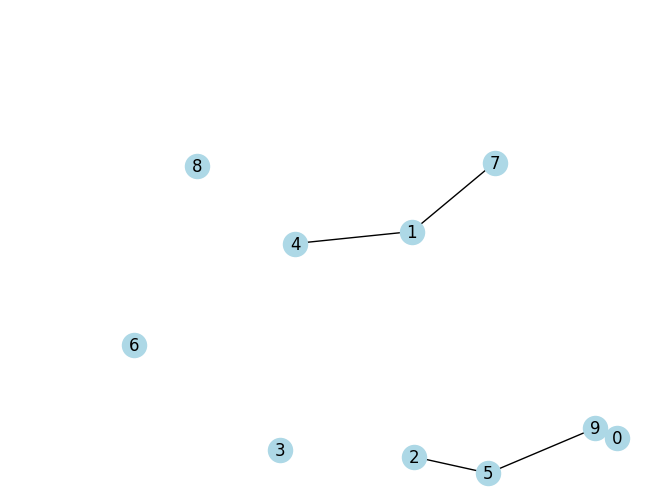

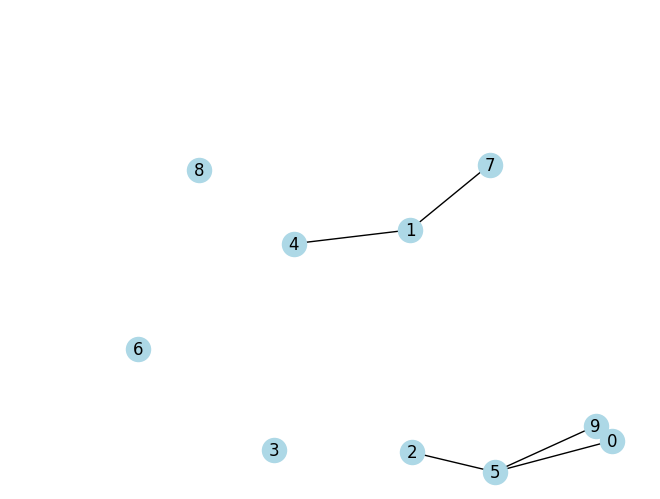

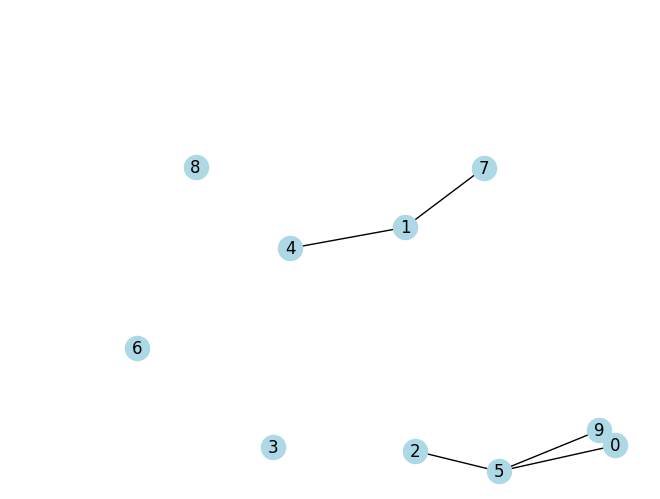

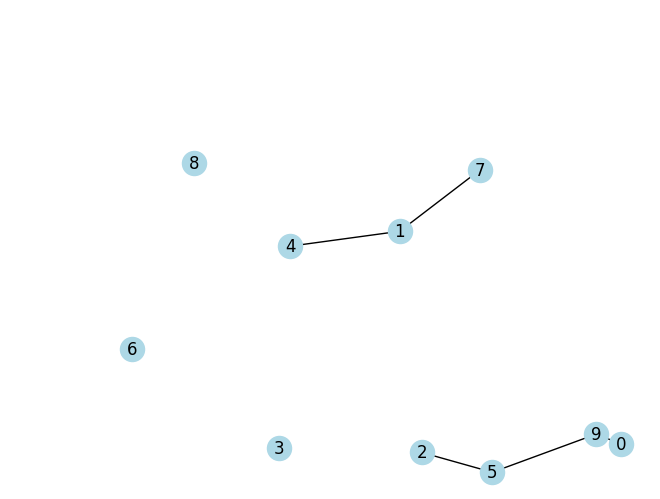

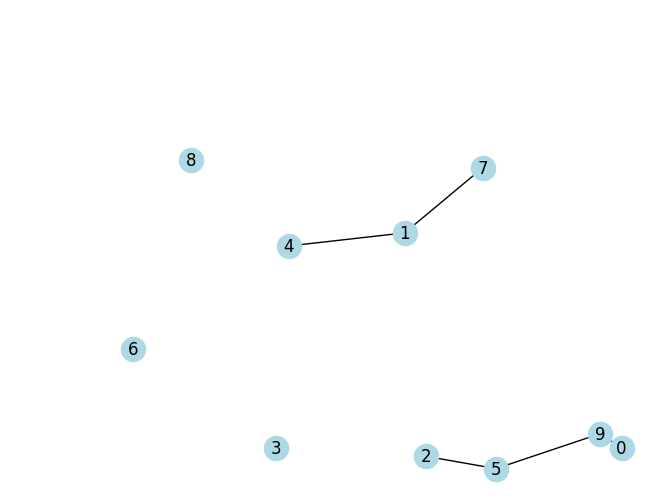

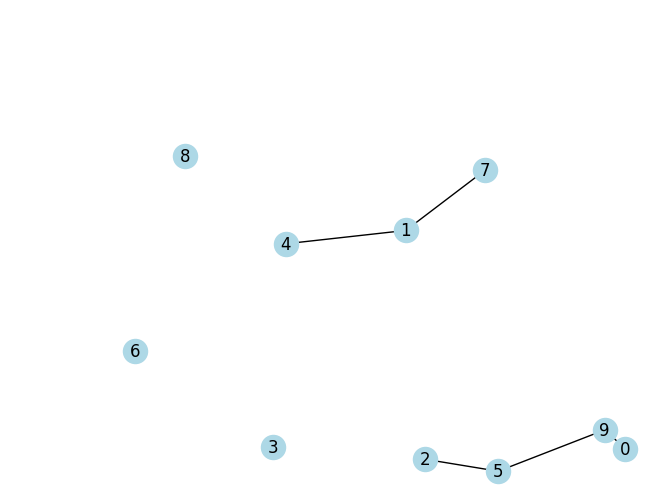

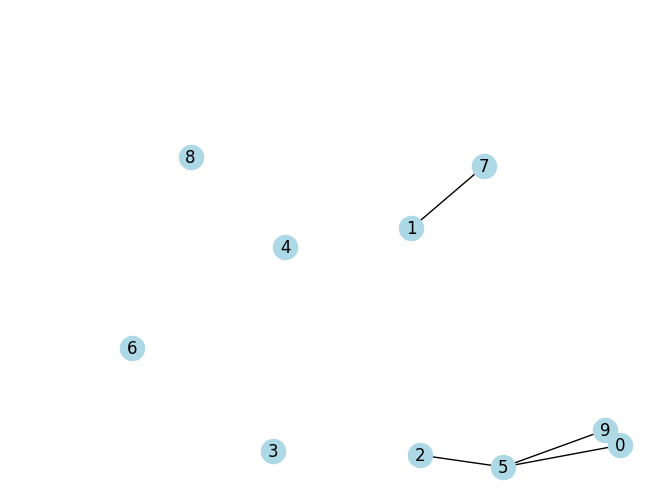

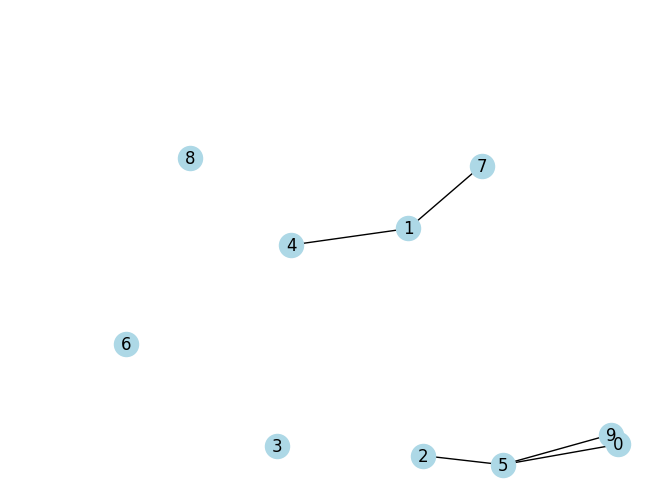

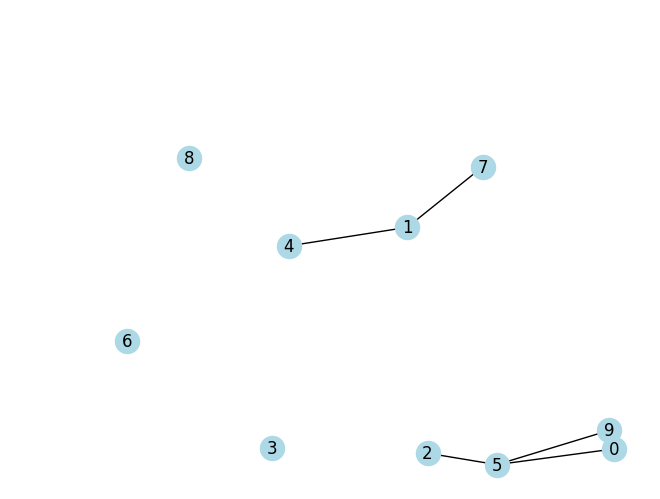

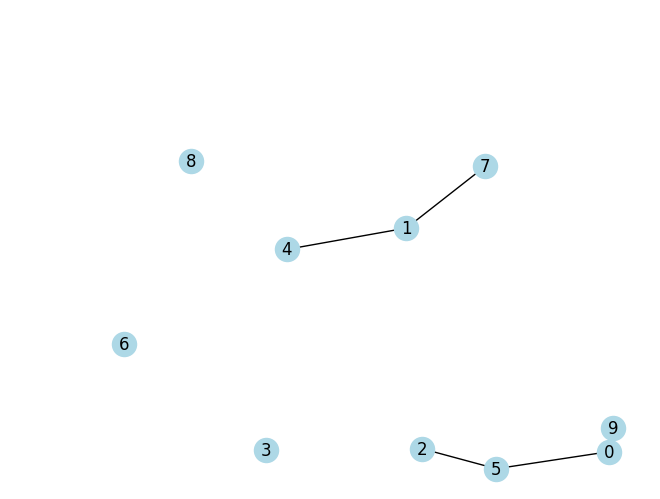

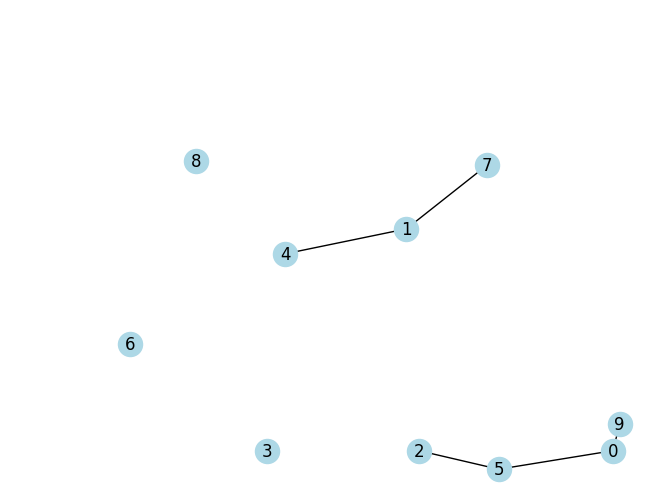

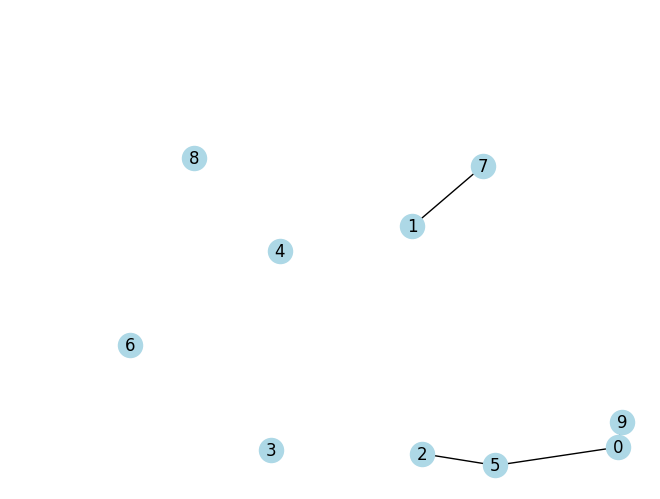

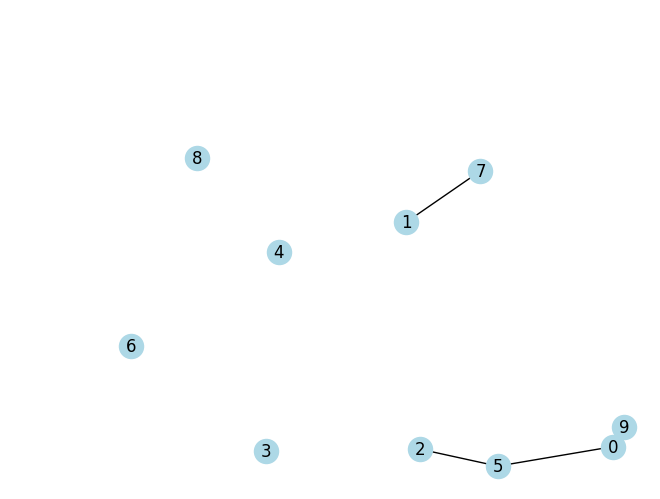

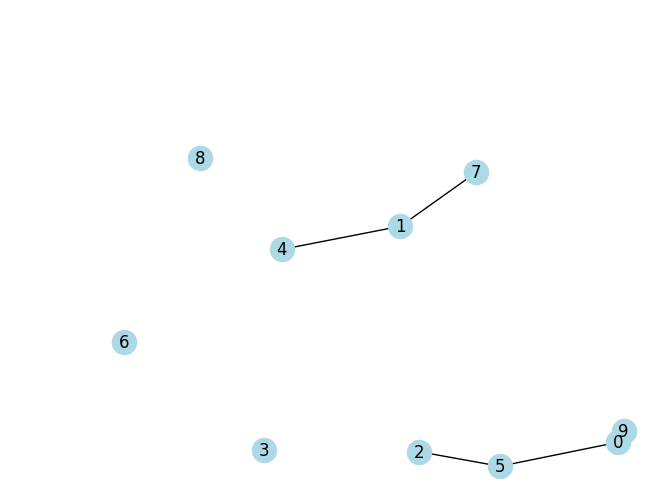

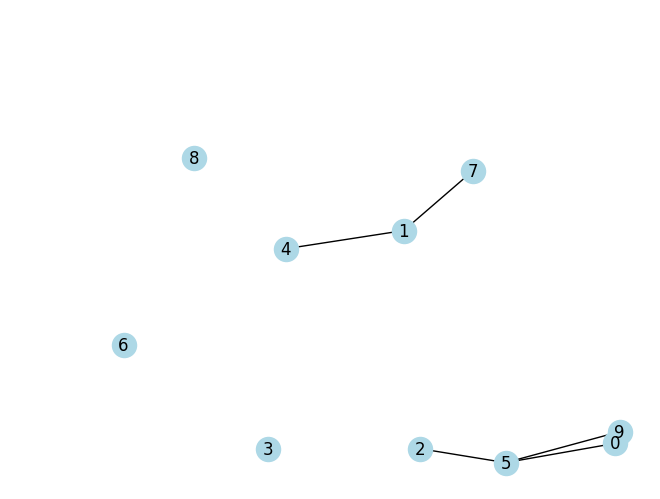

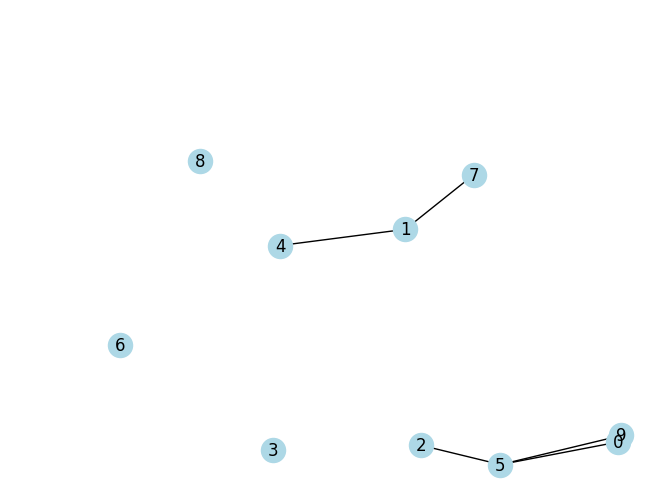

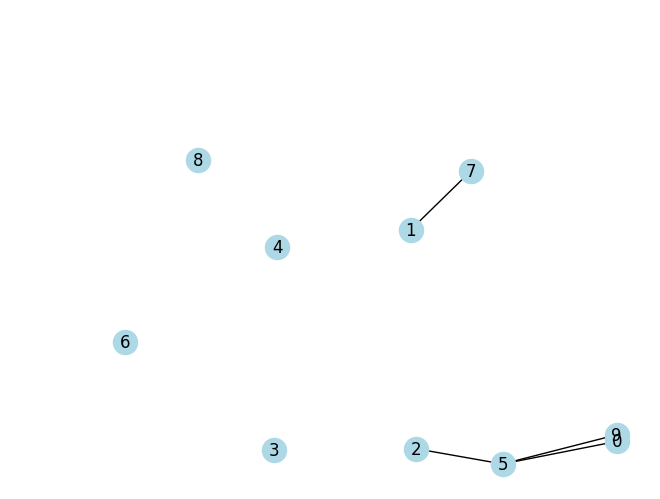

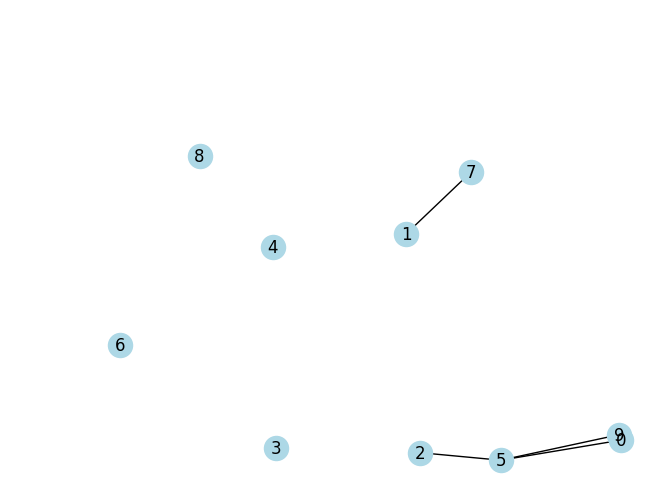

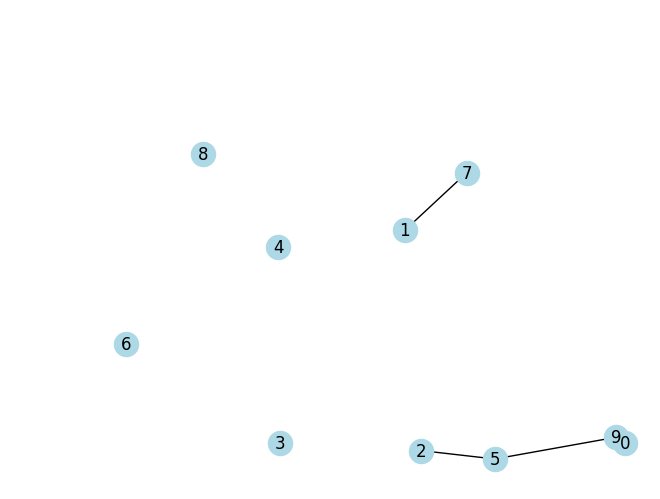

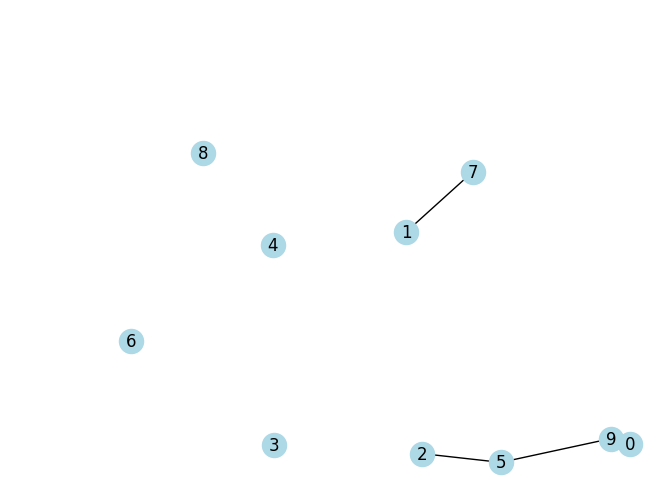

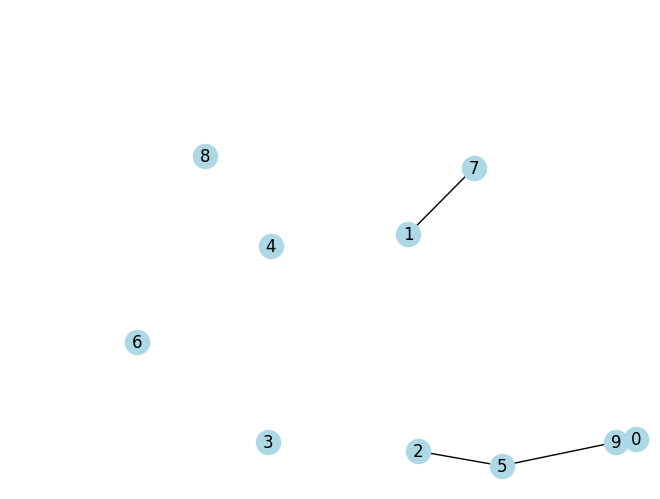

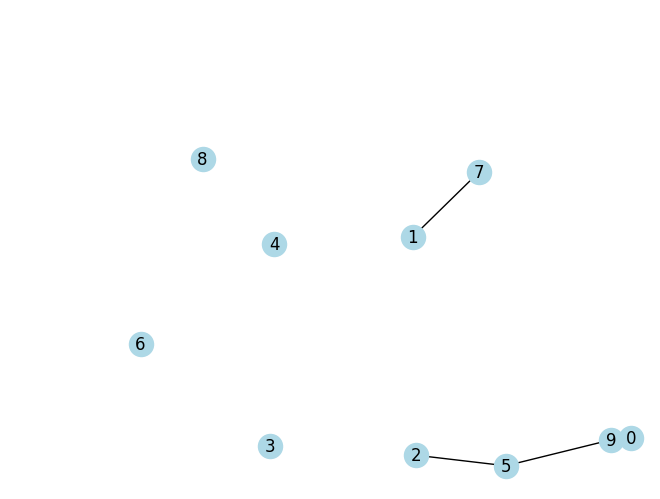

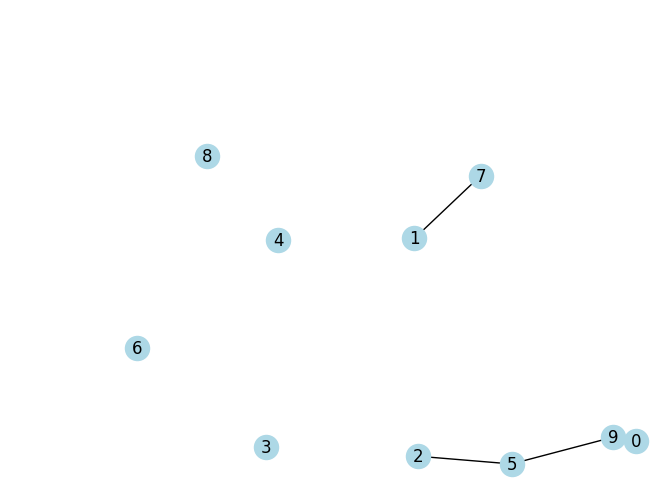

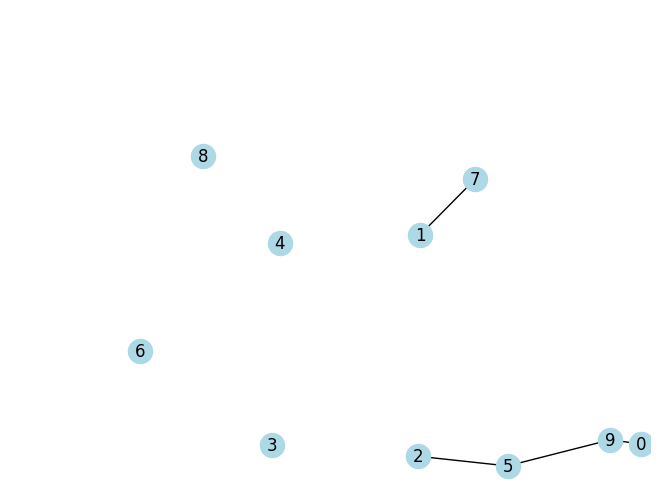

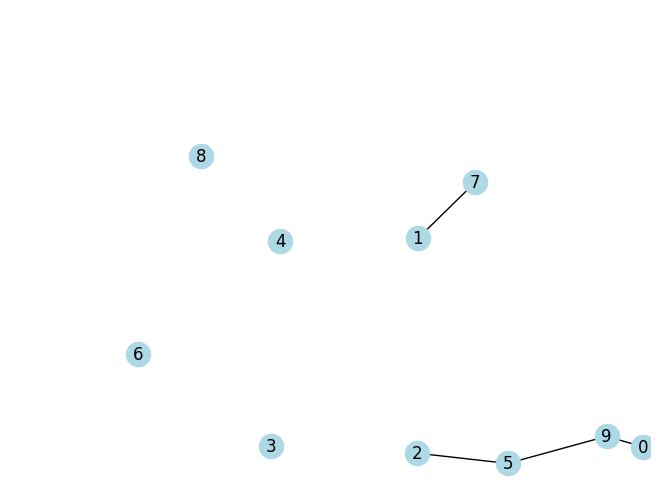

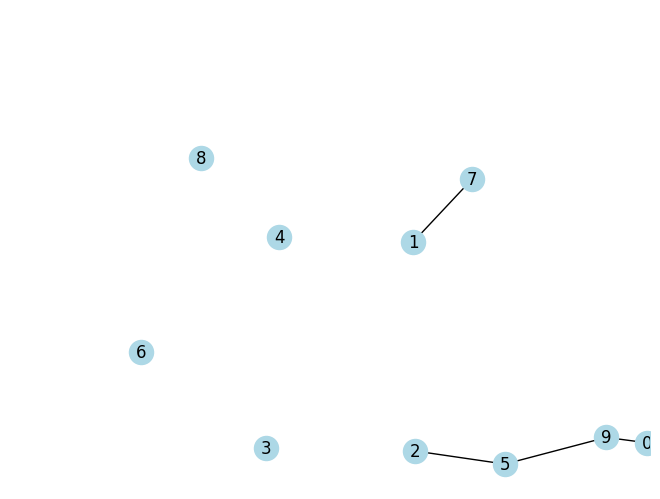

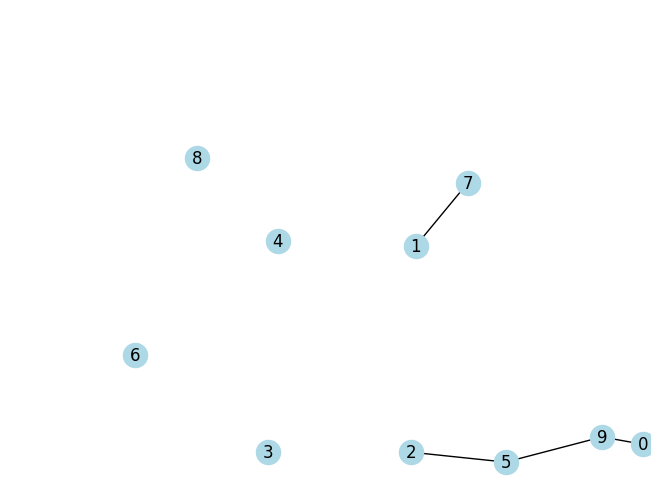

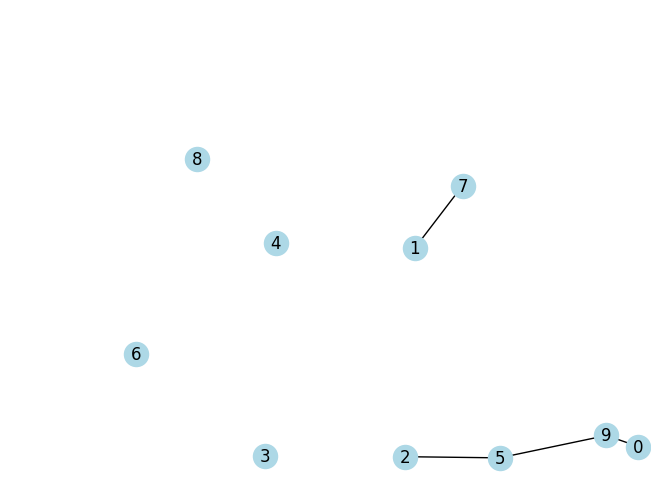

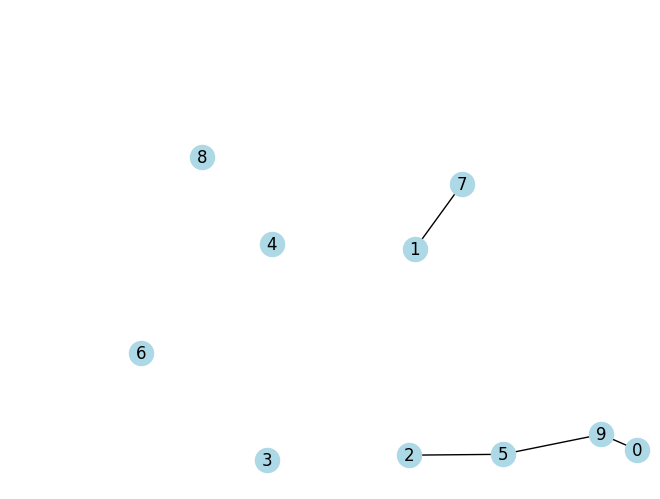

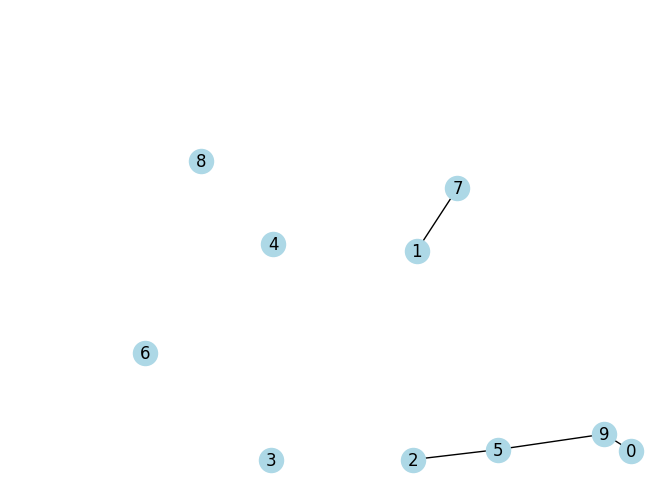

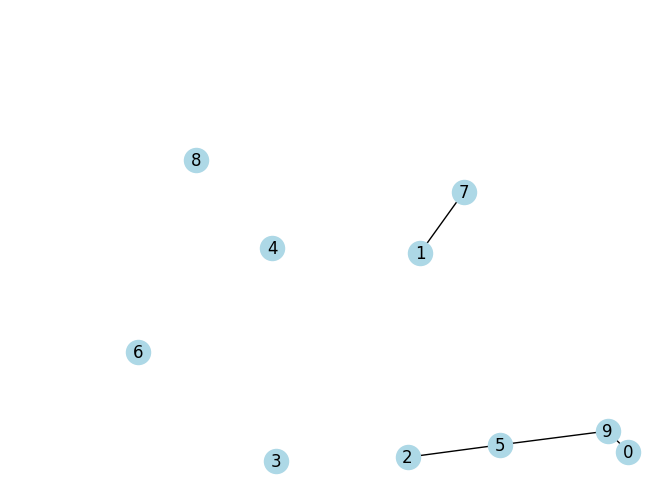

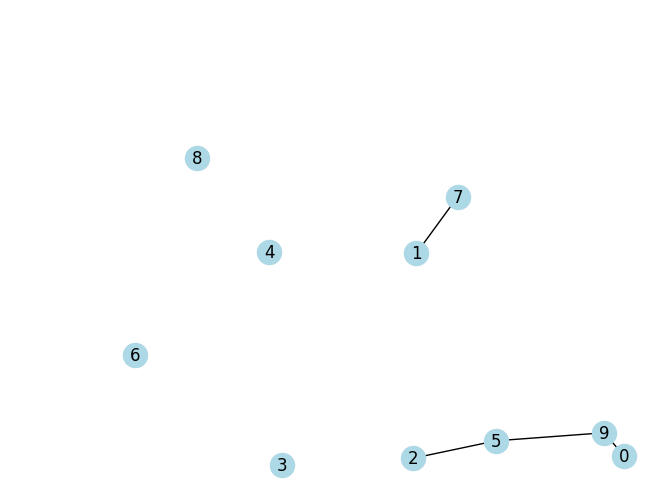

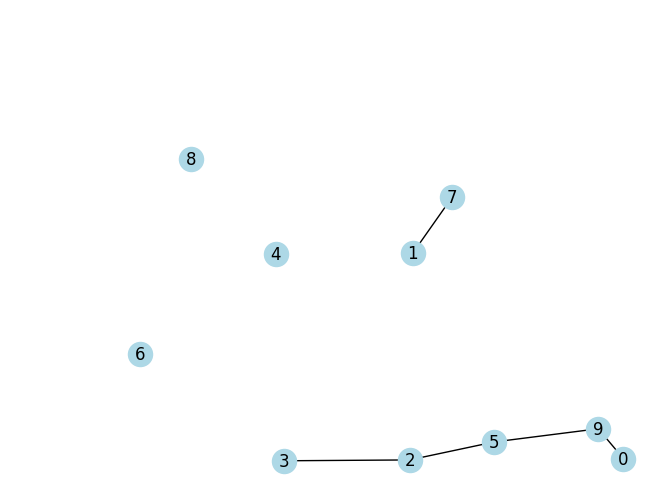

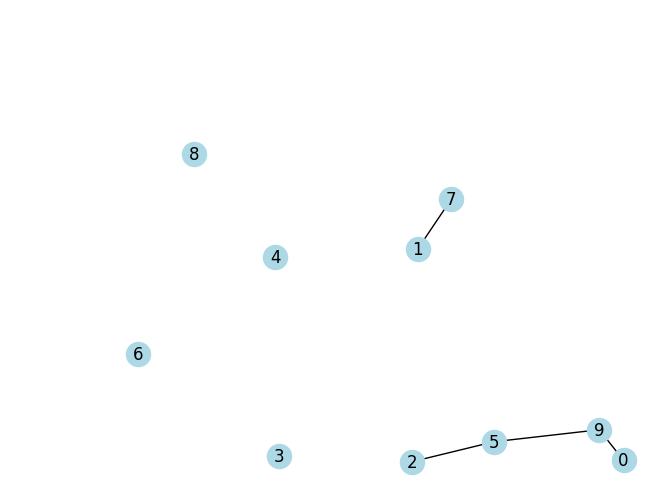

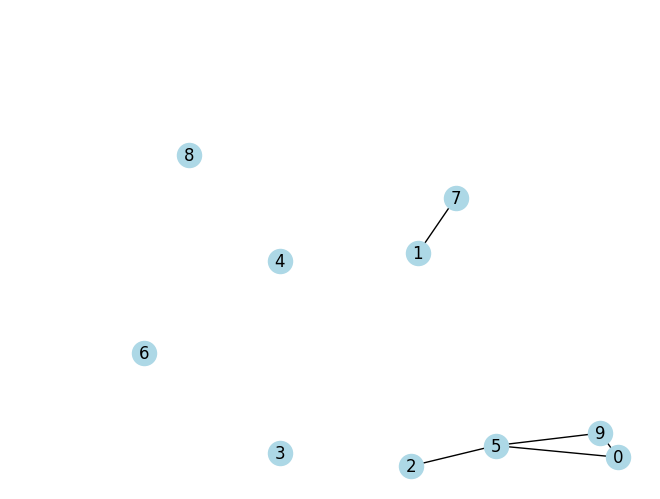

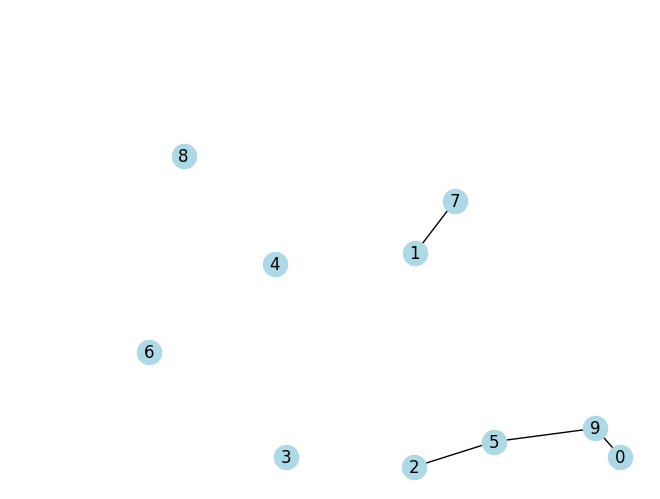

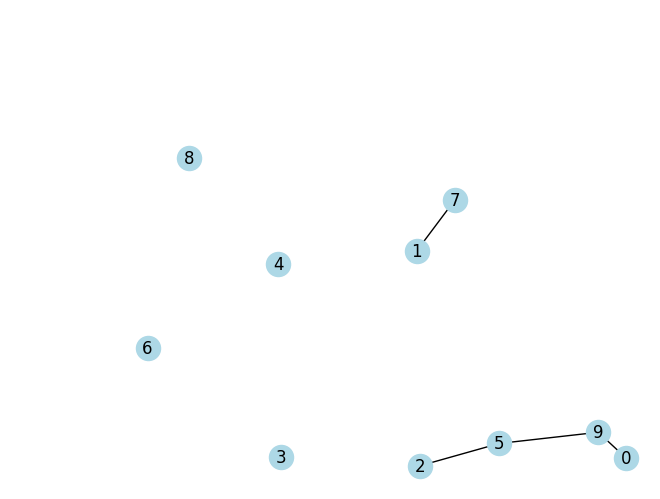

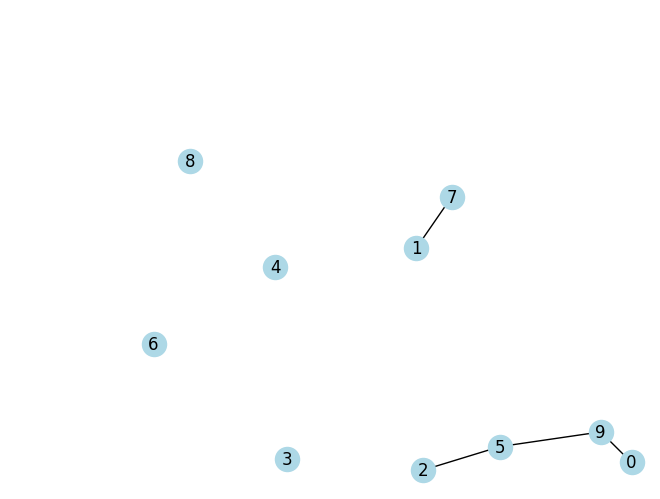

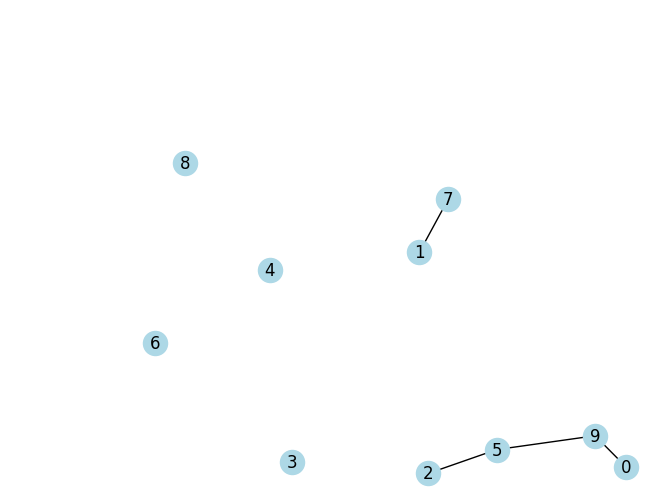

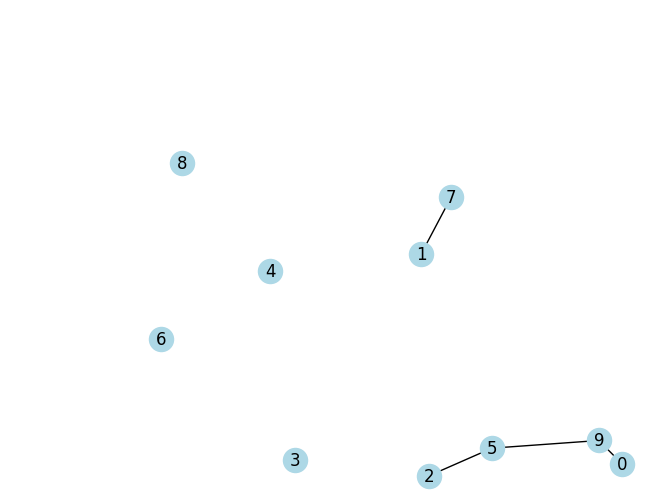

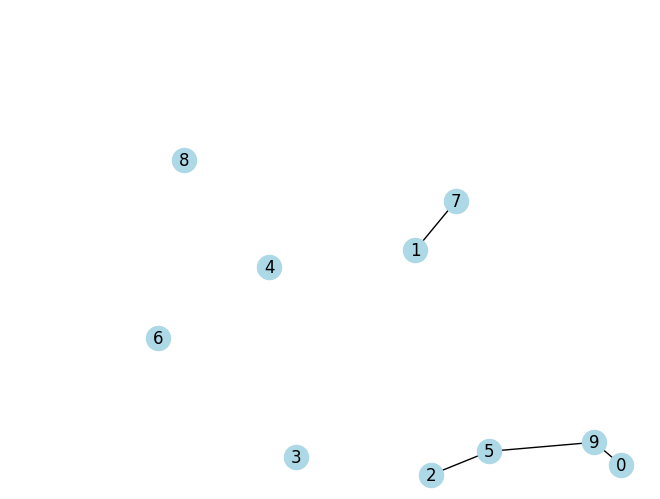

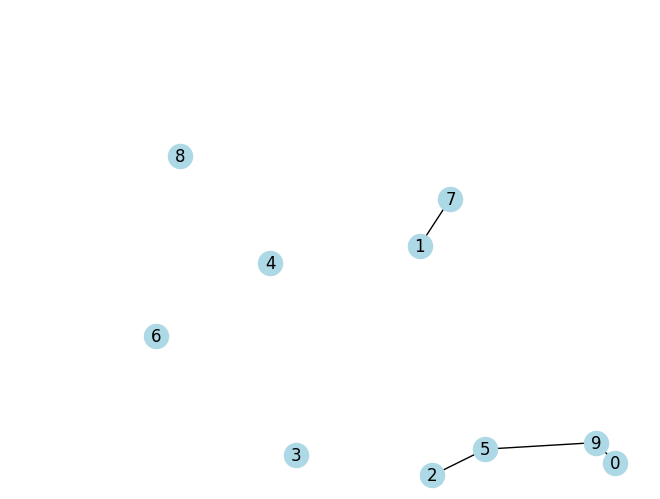

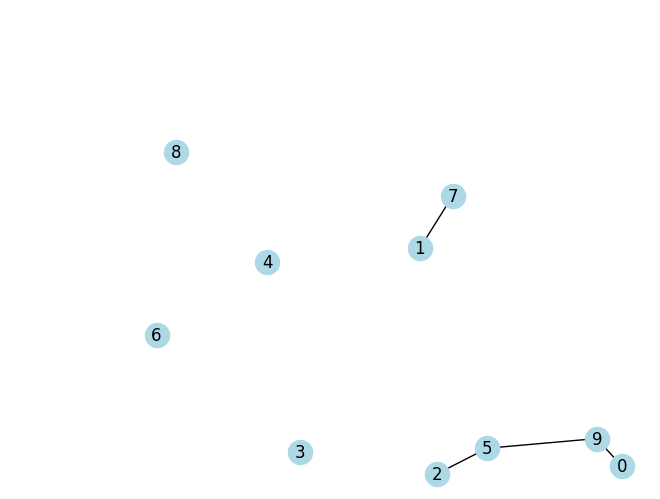

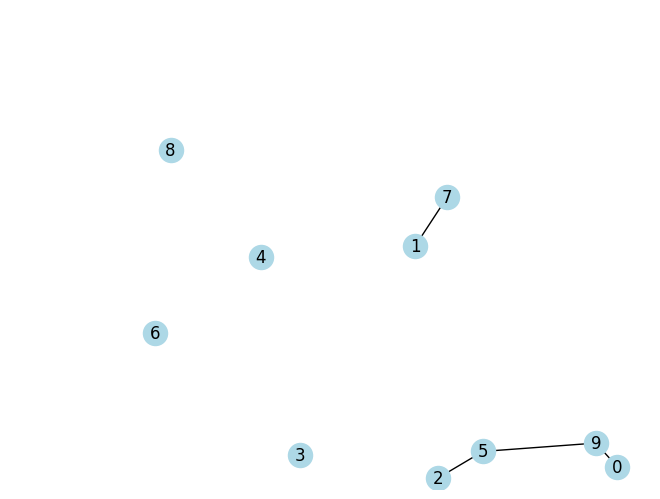

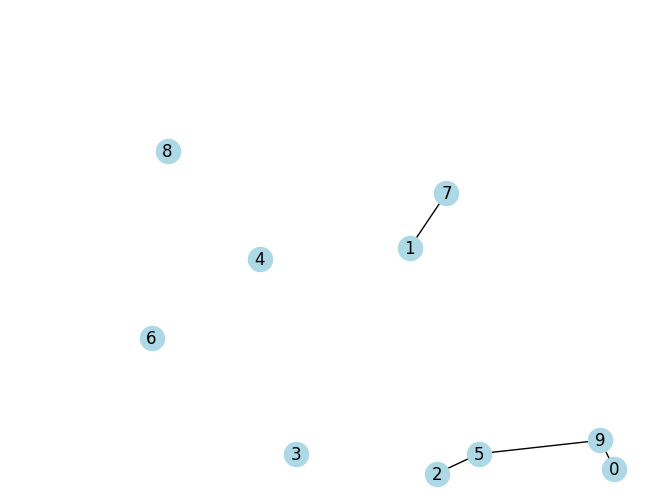

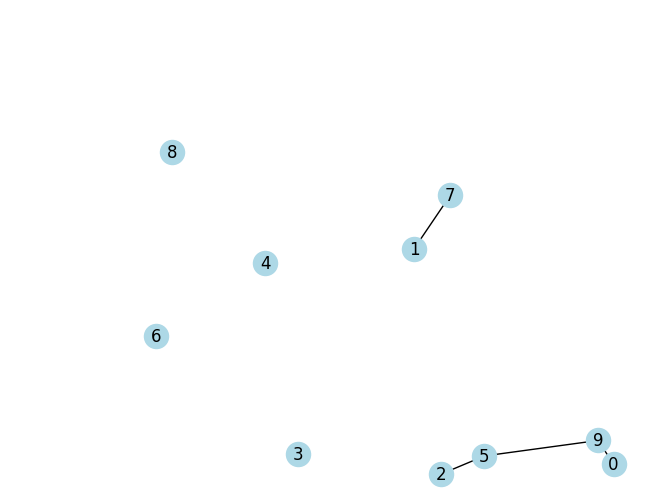

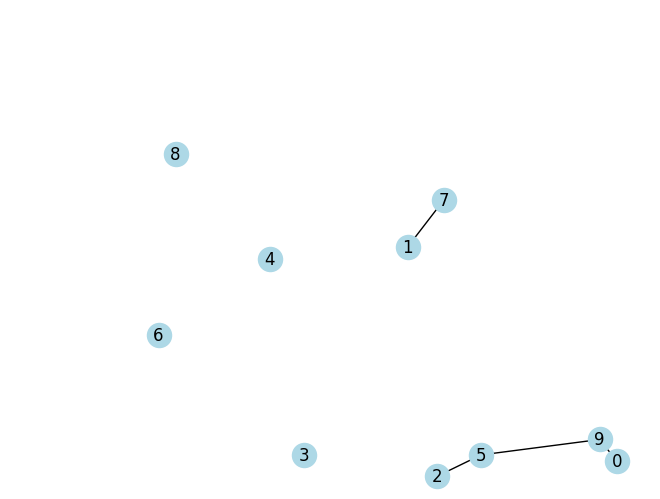

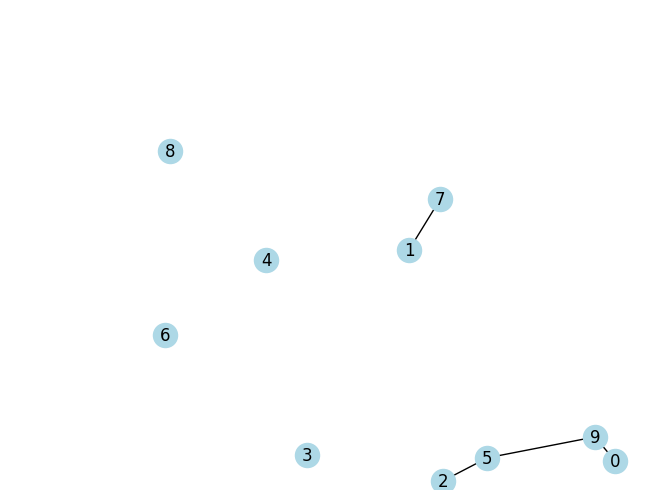

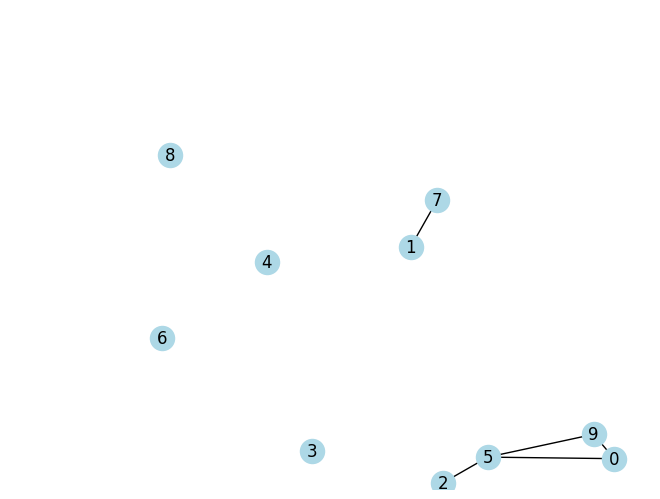

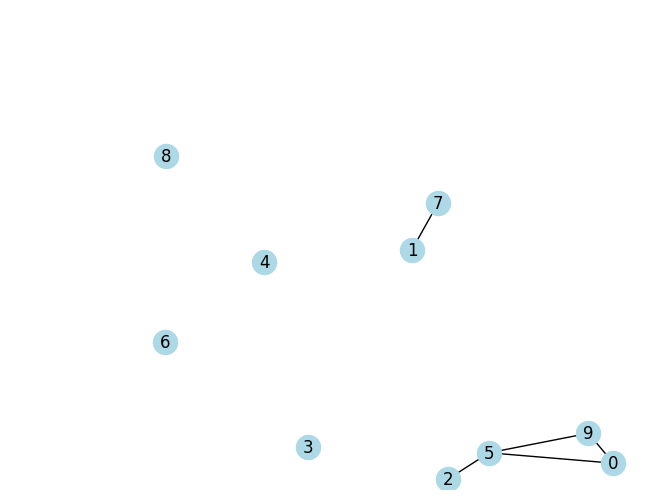

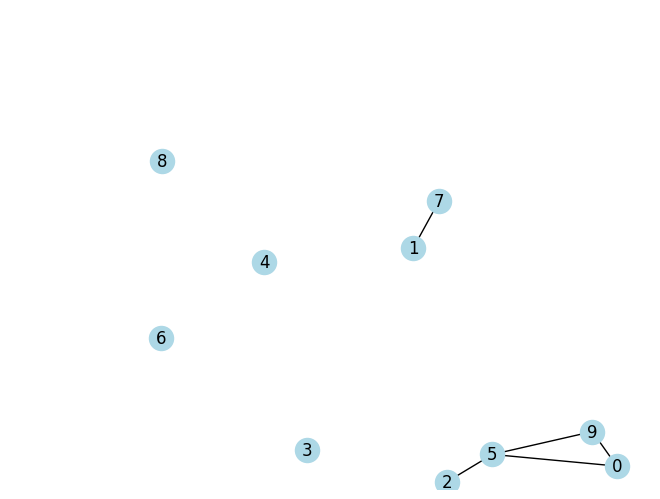

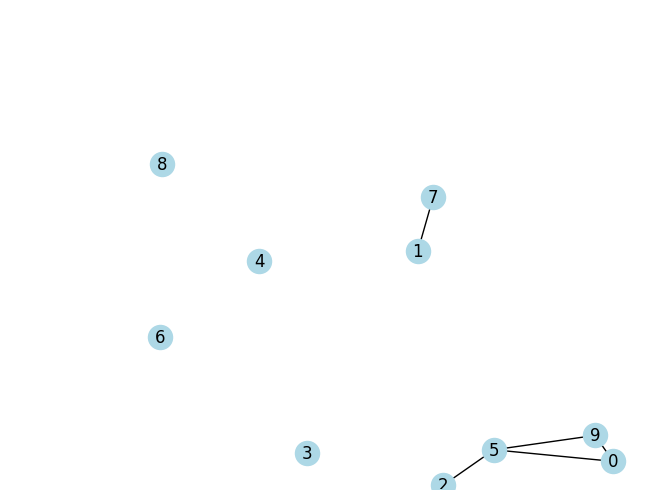

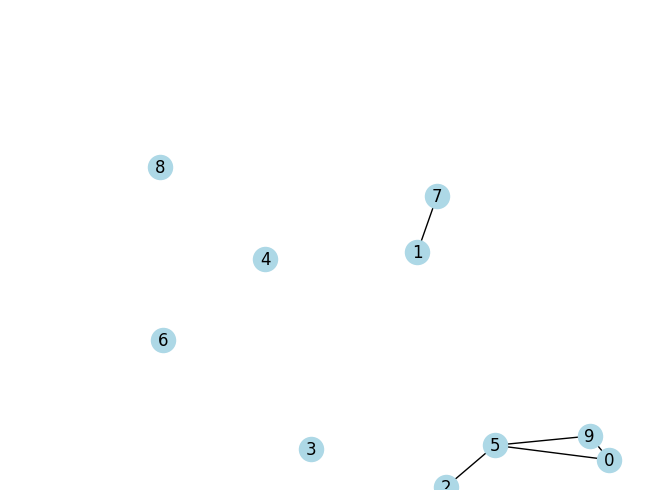

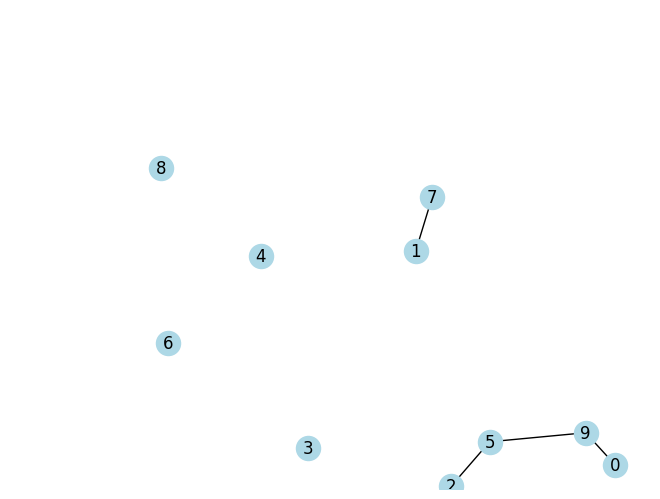

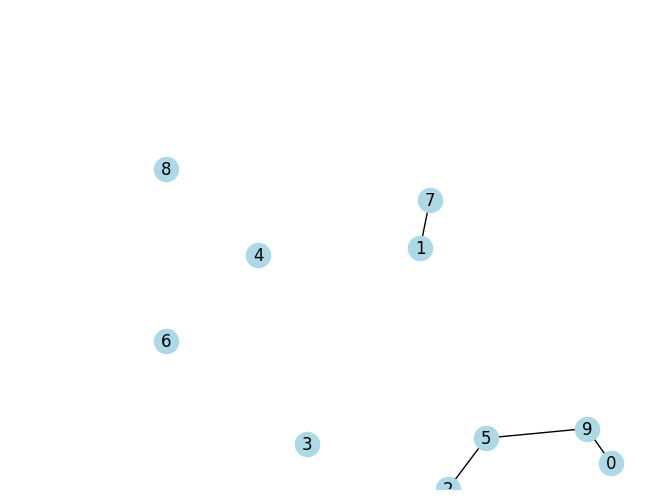

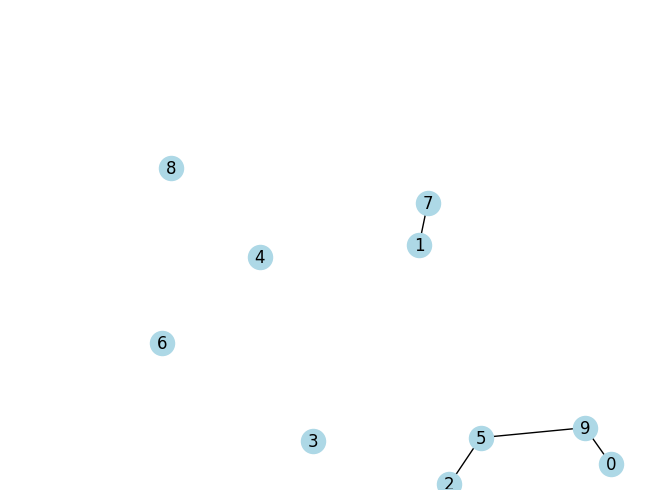

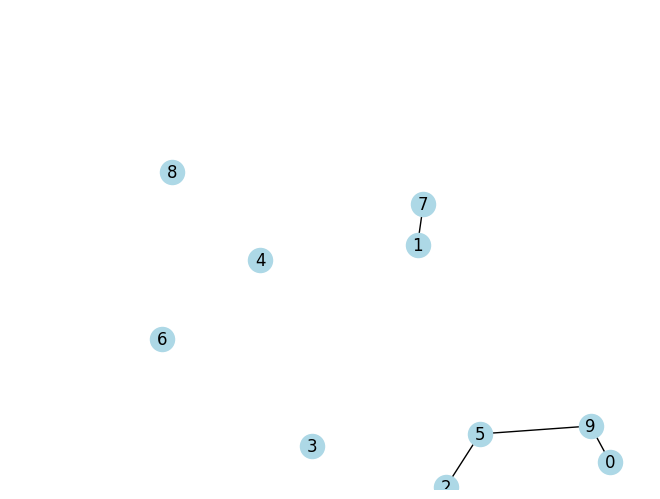

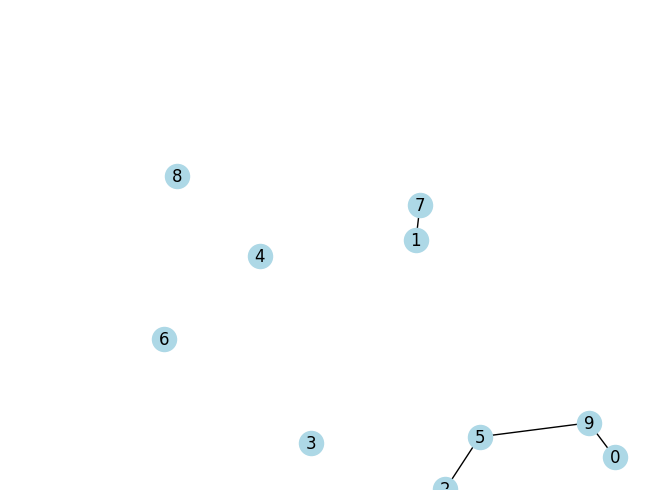

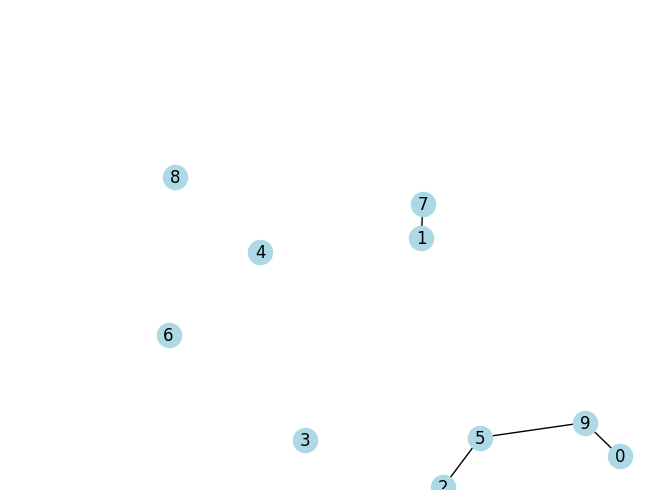

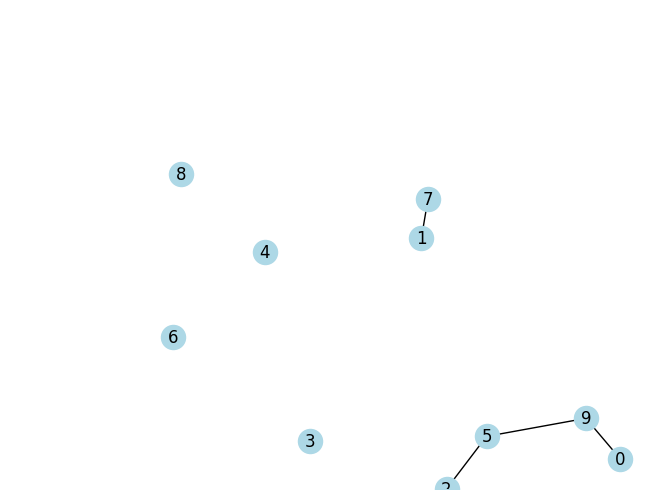

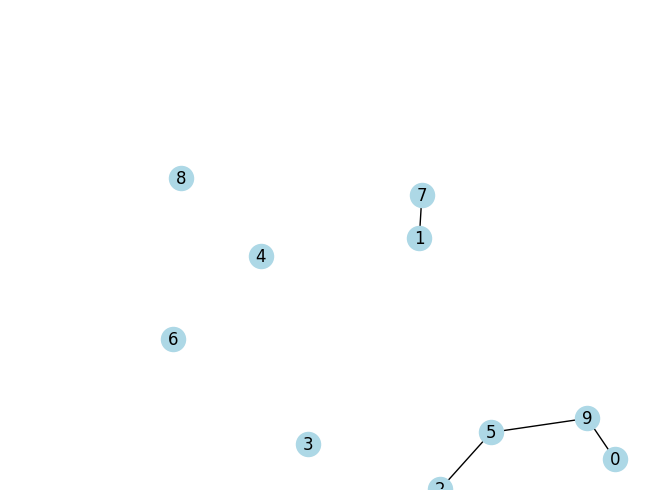

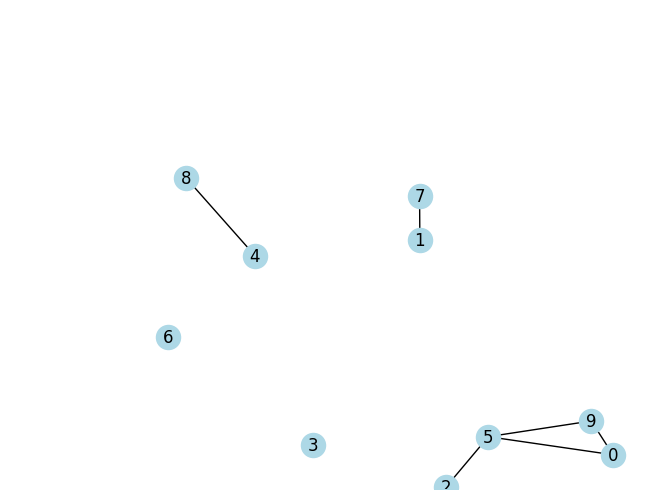

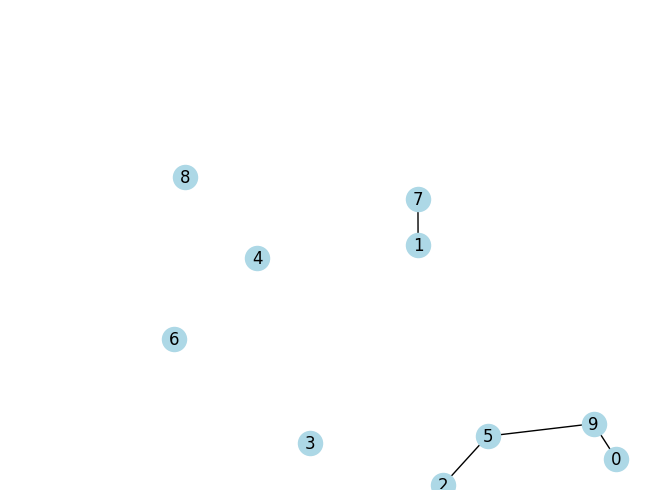

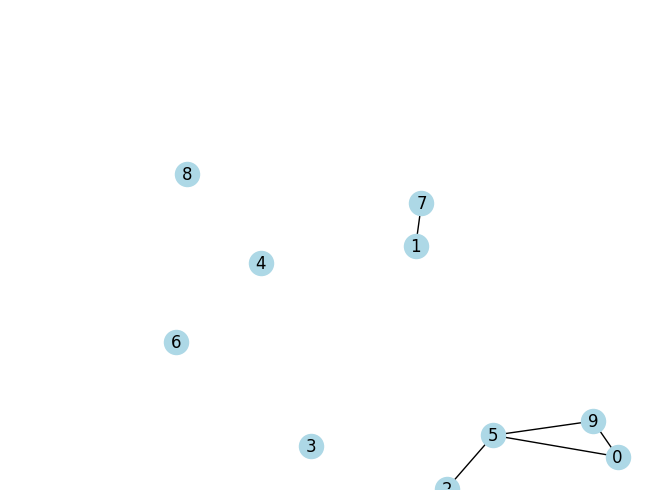

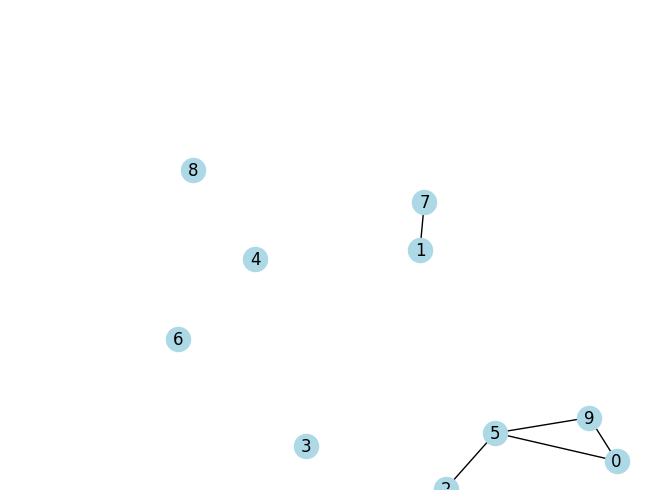

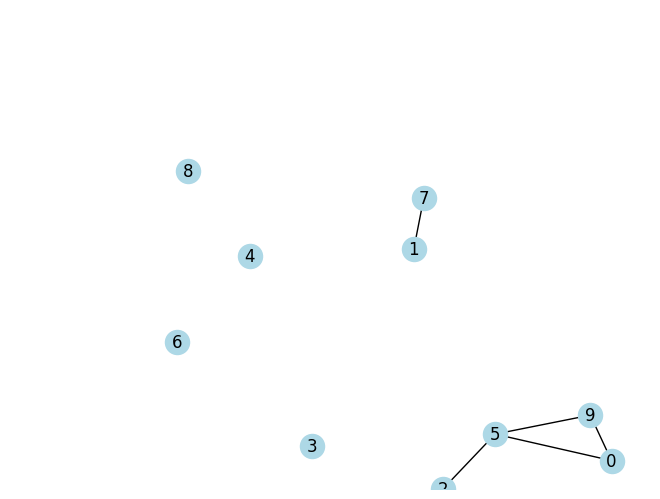

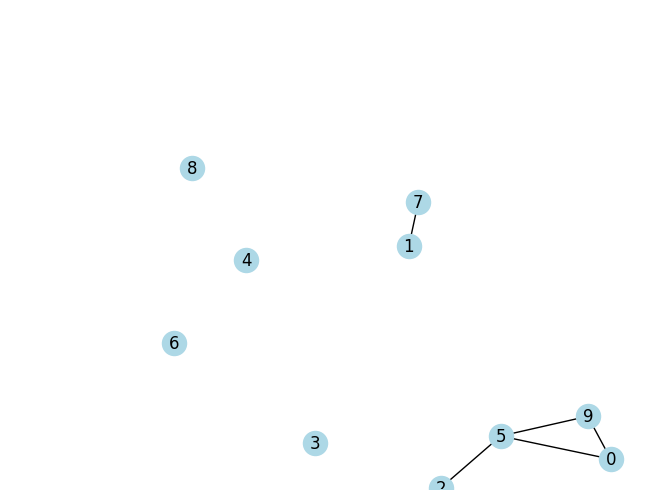

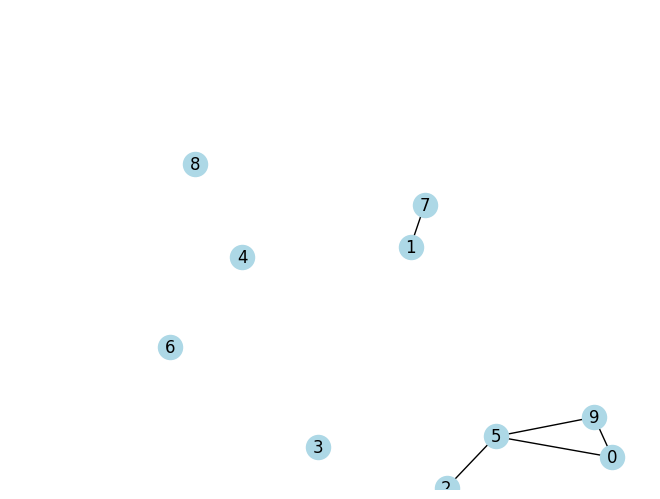

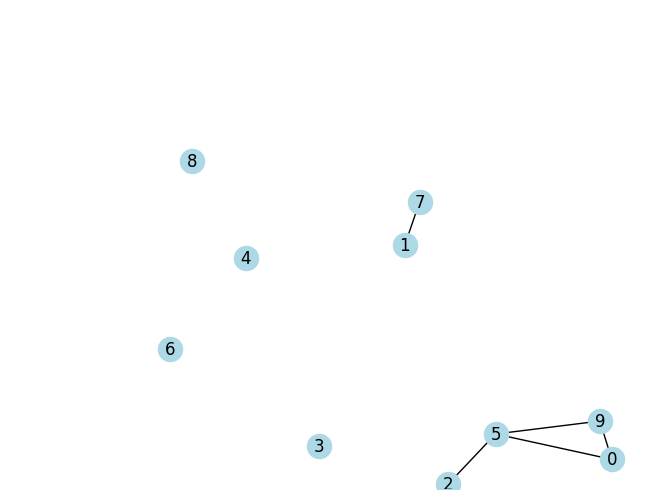

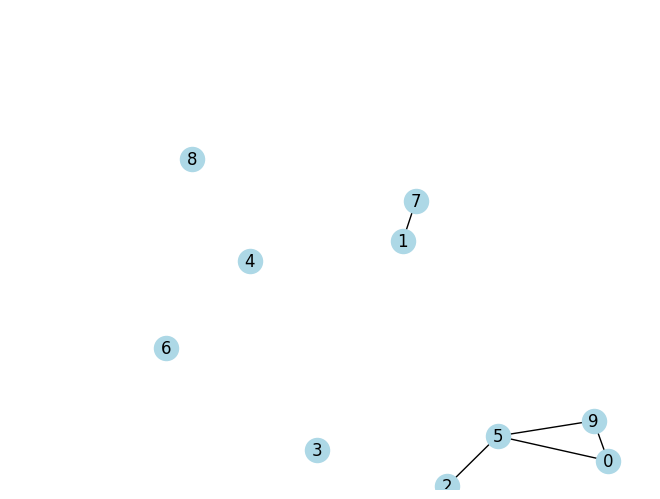

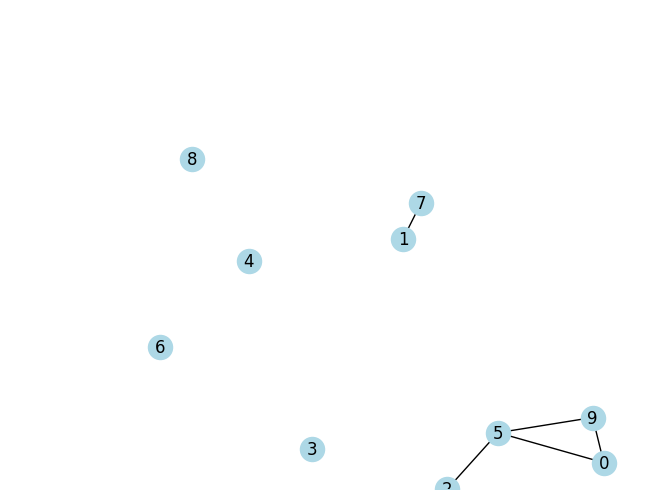

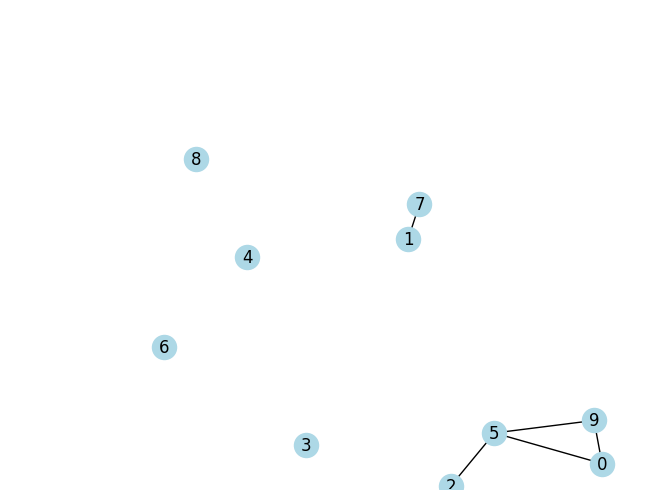

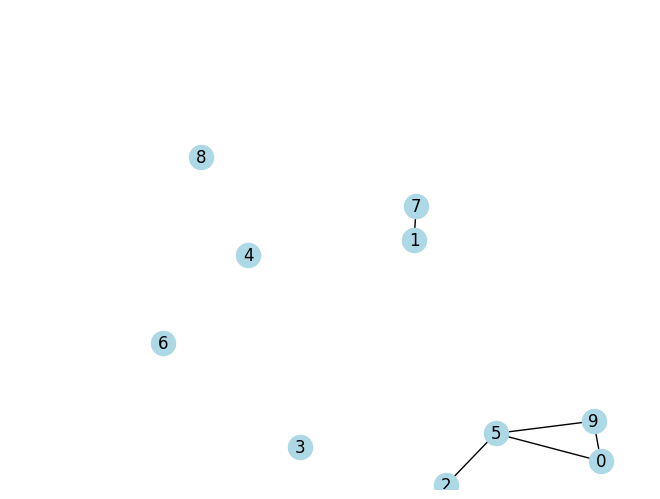

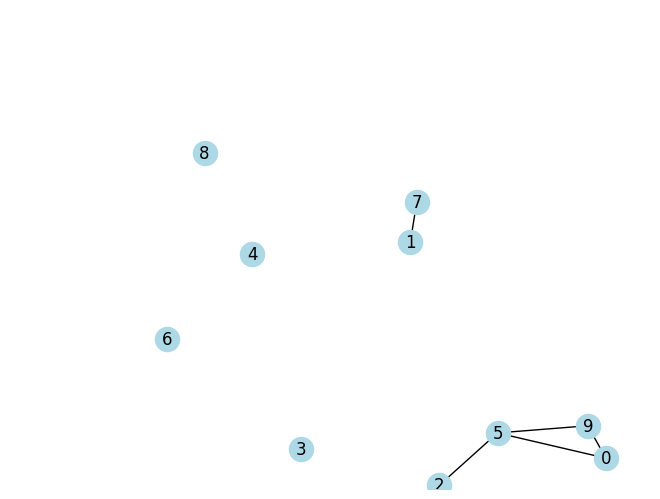

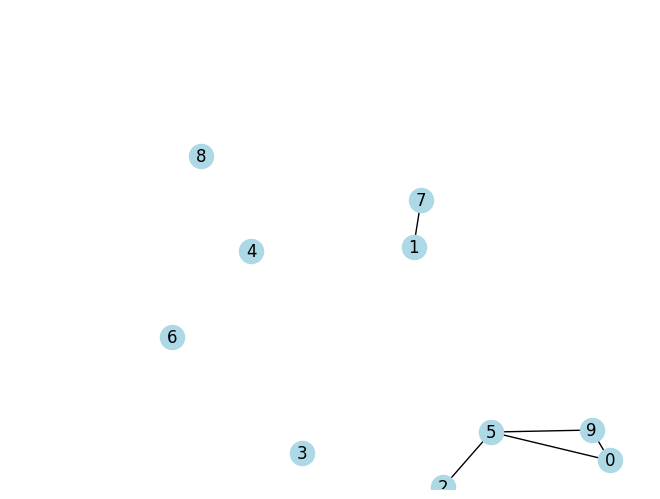

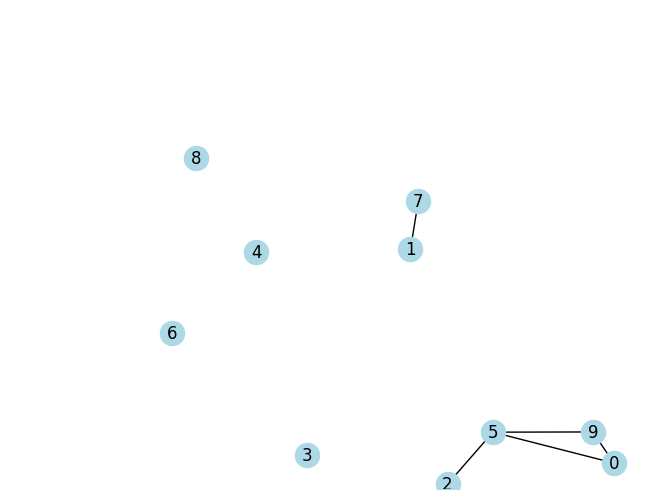

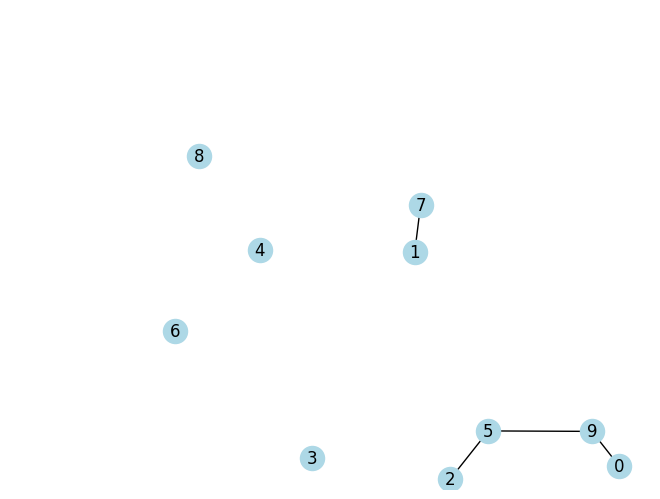

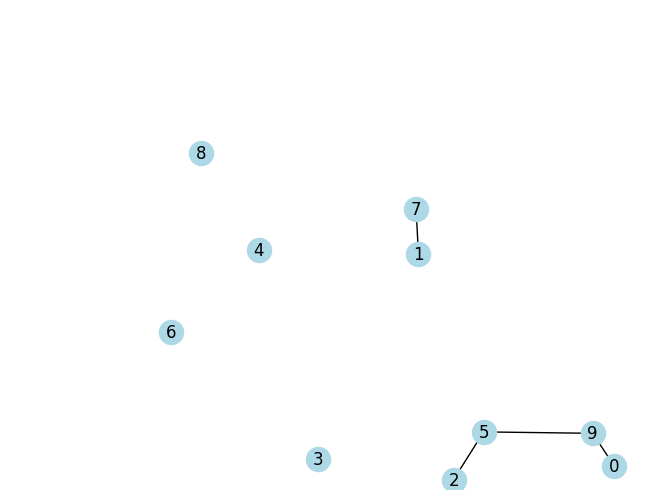

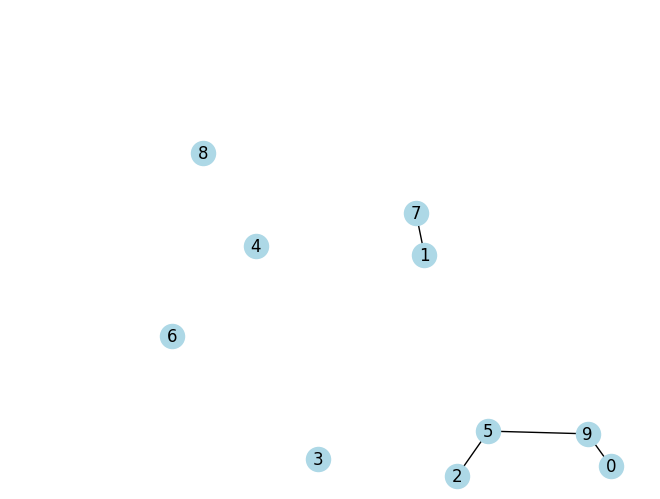

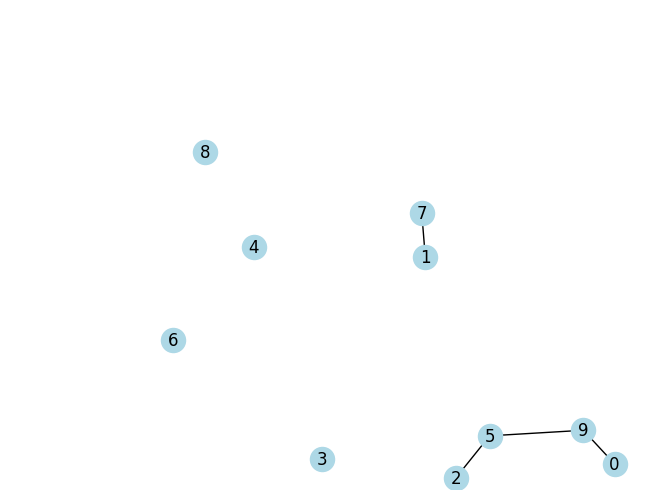

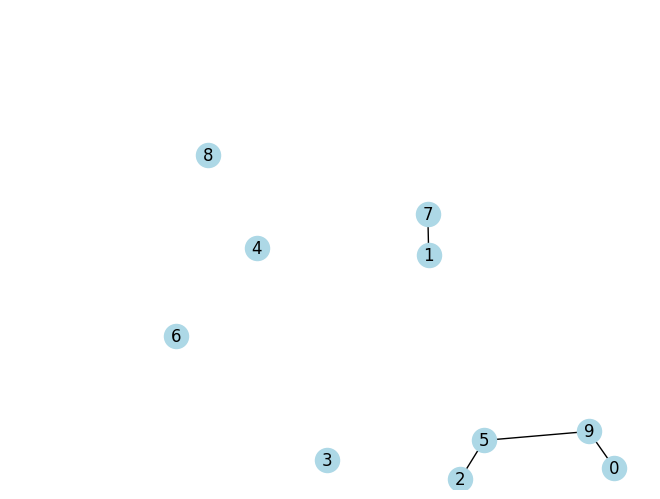

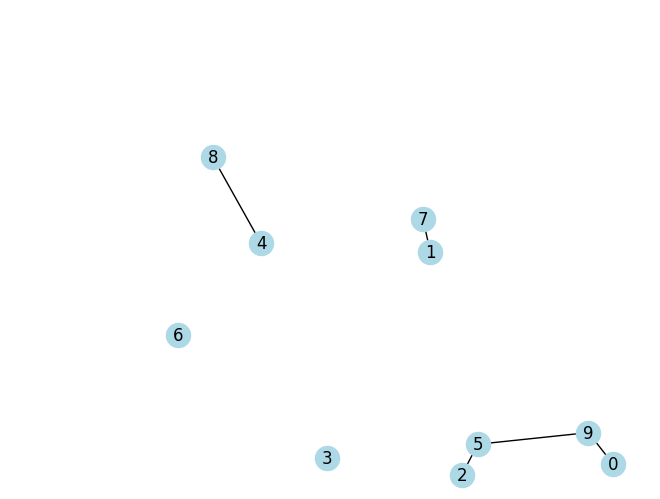

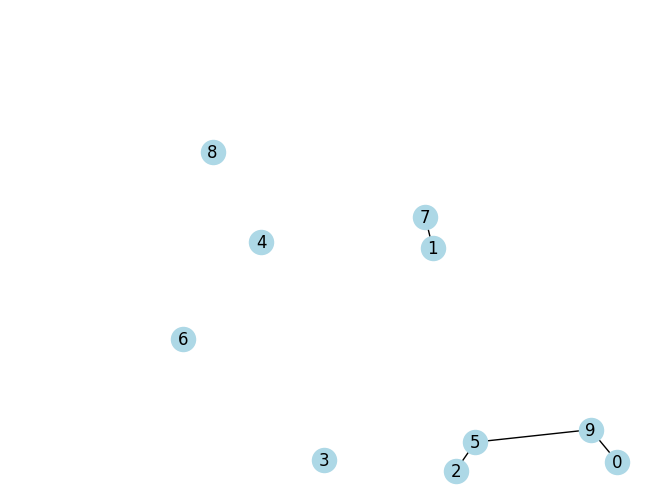

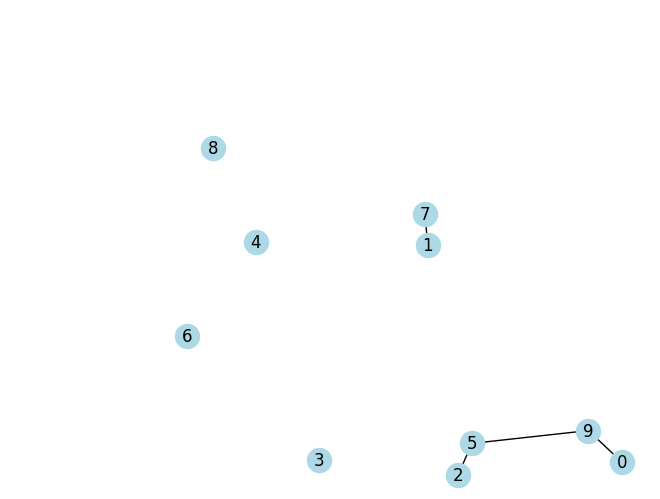

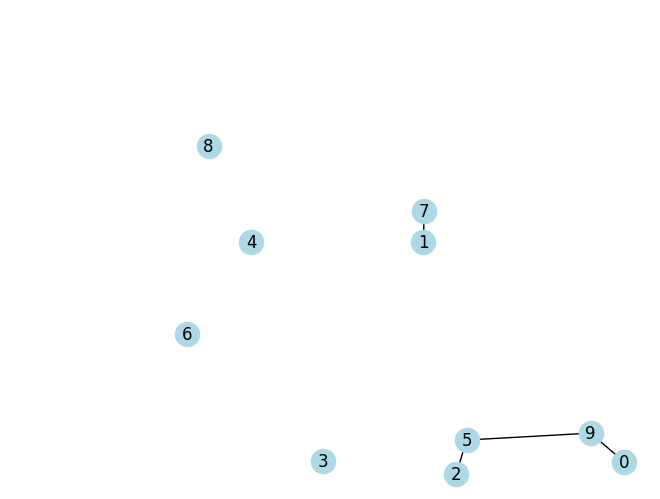

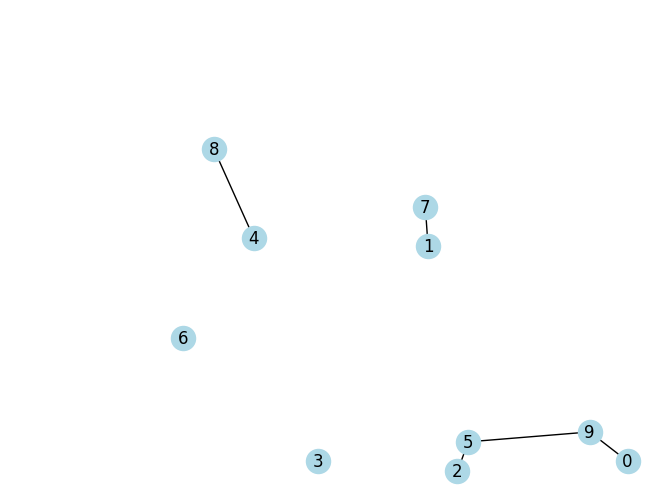

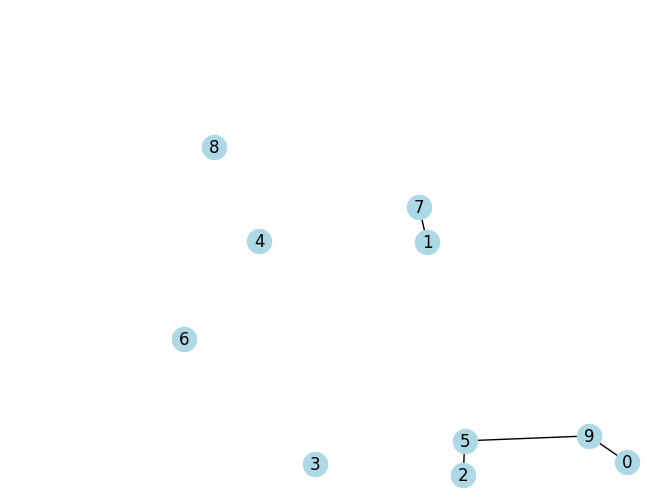

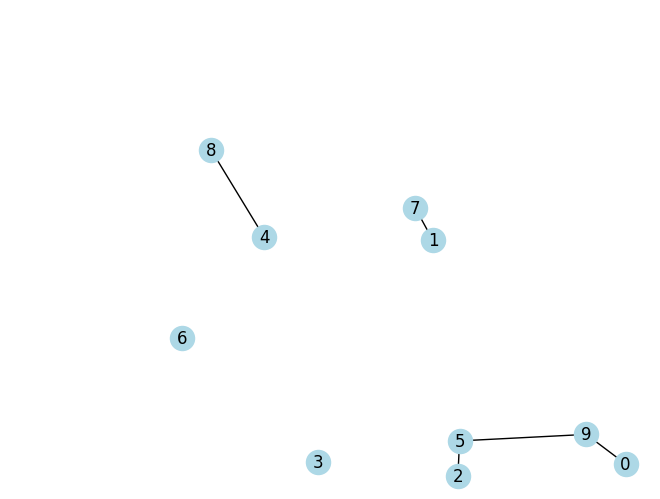

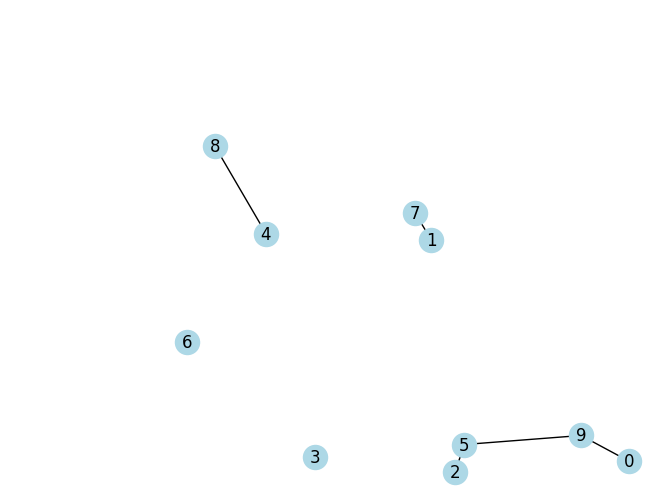

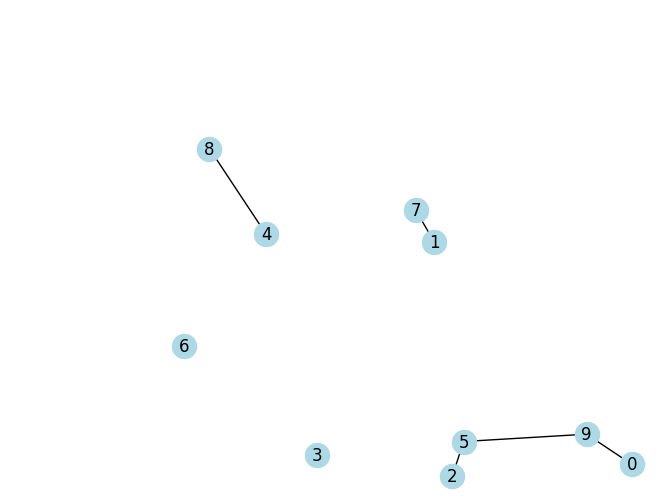

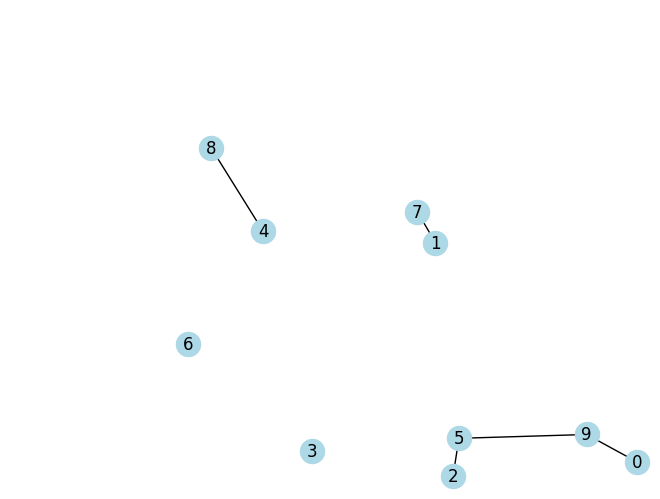

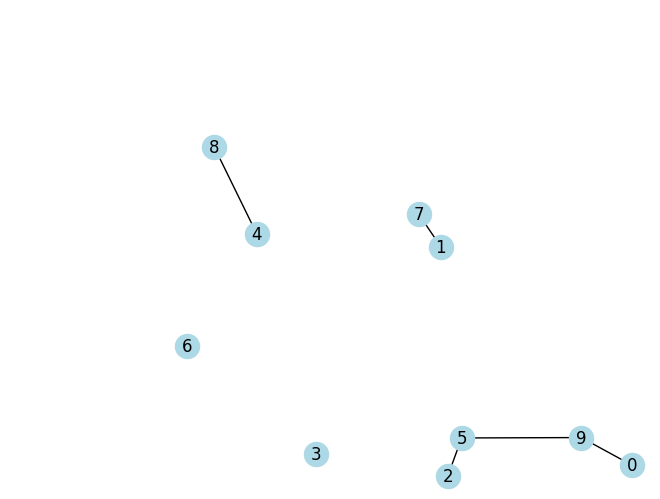

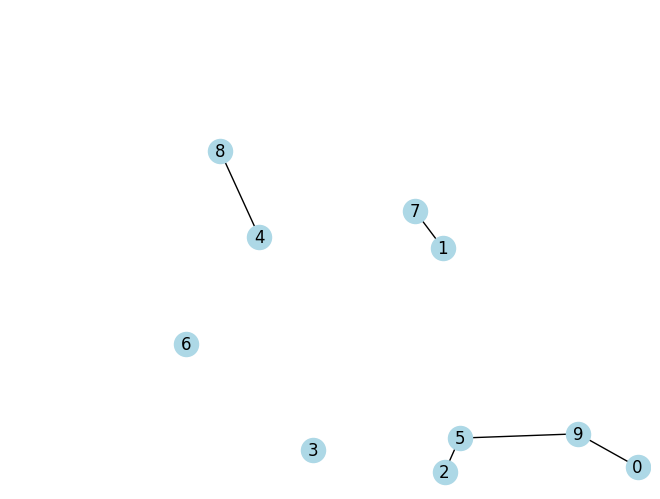

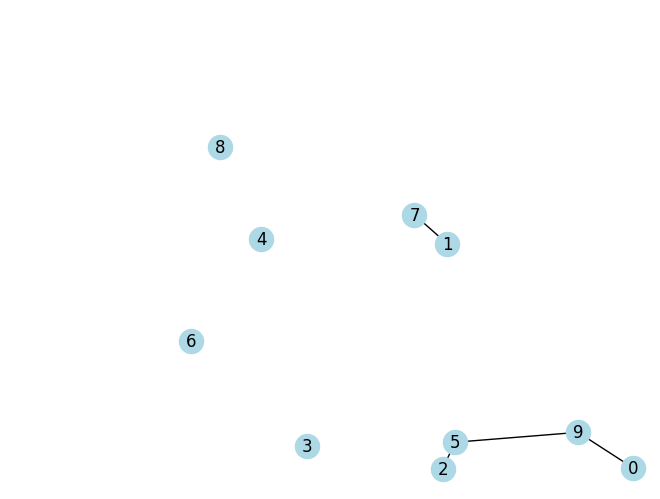

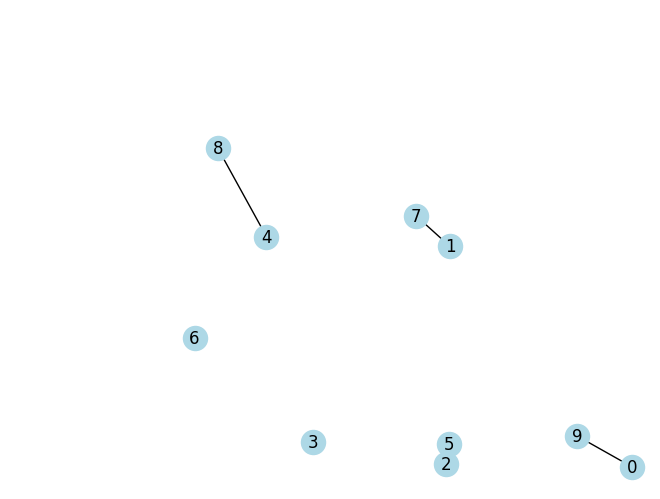

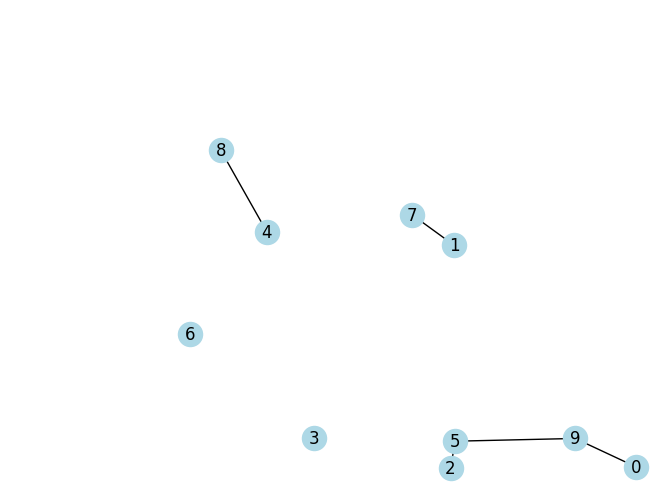

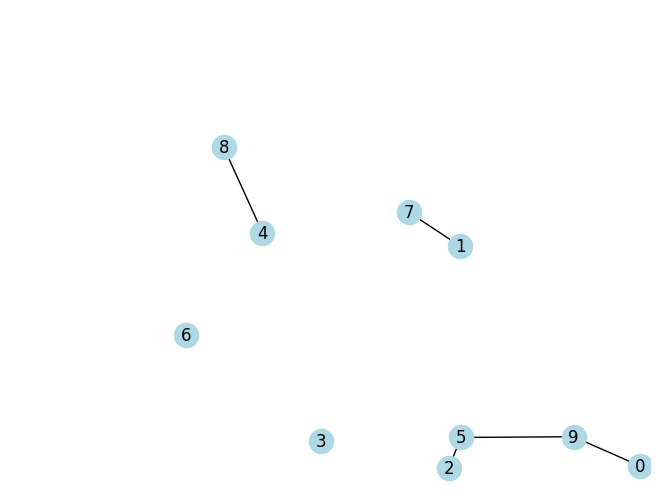

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Parameters
NUM_DRONES = 10
AREA_SIZE = 1000  # Area size in meters
COMM_RANGE = 200  # Communication range in meters
SIM_TIME = 100    # Simulation time in seconds

# Initialize the network
G = nx.Graph()

# Add nodes (drones) with random positions
for i in range(NUM_DRONES):
    x = random.uniform(0, AREA_SIZE)
    y = random.uniform(0, AREA_SIZE)
    G.add_node(i, pos=(x, y))

# Function to update positions (simple random mobility model)
def update_positions(G):
    for node in G.nodes:
        x, y = G.nodes[node]['pos']
        x += random.uniform(-10, 10)
        y += random.uniform(-10, 10)
        # Ensure the drone stays within the area
        x = max(0, min(x, AREA_SIZE))
        y = max(0, min(y, AREA_SIZE))
        G.nodes[node]['pos'] = (x, y)

# Function to update edges based on communication range
def update_edges(G):
    G.clear_edges()
    nodes = list(G.nodes)
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            pos_i = G.nodes[nodes[i]]['pos']
            pos_j = G.nodes[nodes[j]]['pos']
            distance = ((pos_i[0] - pos_j[0])**2 + (pos_i[1] - pos_j[1])**2)**0.5
            if distance <= COMM_RANGE:
                G.add_edge(nodes[i], nodes[j])

# Function to visualize the network
def visualize_network(G):
    plt.clf()
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue')
    plt.xlim(0, AREA_SIZE)
    plt.ylim(0, AREA_SIZE)
    plt.pause(0.1)

# Simulation loop
for t in range(SIM_TIME):
    update_positions(G)
    update_edges(G)
    visualize_network(G)

plt.show()

In [3]:
# Function to simulate message flooding
def flood_message(G, source, destination, message):
    visited = set()
    queue = [(source, message)]

    while queue:
        current_node, current_message = queue.pop(0)
        if current_node == destination:
            print(f"Message reached destination: {current_message}")
            return
        if current_node not in visited:
            visited.add(current_node)
            for neighbor in G.neighbors(current_node):
                queue.append((neighbor, current_message))

# Example usage
source = 0
destination = NUM_DRONES - 1
message = "Hello, Drone!"
flood_message(G, source, destination, message)

Message reached destination: Hello, Drone!
